In [2]:
using Statistics
using NetCDF
using PyPlot
include("plotmap.jl");
fname="data/cmip6/ACCESS-CM2/rsdt/historical/rsdt_Amon_ACCESS-CM2_historical_r1i1p1f1_gr_185001-201412.year.nc"
ncinfo(fname) #information about the variables 
incident0=ncread(fname, "rsdt"); #1850-2014
lon=ncread(fname, "lon");
lat=ncread(fname, "lat");
time=ncread(fname, "time");
incident=incident0[:,:,101:165]
#incident=incident0

fname="data/cmip6/ACCESS-CM2/rsut/historical/rsut_Amon_ACCESS-CM2_historical_r1i1p1f1_gr_185001-201412.year.nc"
ncinfo(fname) #information about the variables 
outgoing0=ncread(fname, "rsut"); #1850-2014
lon=ncread(fname, "lon");
lat=ncread(fname, "lat");
time=ncread(fname, "time");
outgoing=outgoing0[:,:,101:165] #1950-2014
#outgoing=outgoing0





##### NetCDF File #####

/home/jupyter-clima4/data/cmip6/ACCESS-CM2/rsdt/historical/rsdt_Amon_ACCESS-CM2_historical_r1i1p1f1_gr_185001-201412.year.nc

##### Dimensions #####

Name                                                Length                    
--------------------------------------------------------------------------------
lat                                                 180                       
time                                                UNLIMITED (165 currently) 
bnds                                                2                         
lon                                                 360                       

##### Variables #####

Name                            Type            Dimensions                      
--------------------------------------------------------------------------------
lat                             DOUBLE          lat                             
time                            DOUBLE          time                            


360×180×65 Array{Float32, 3}:
[:, :, 1] =
 116.6    116.819  117.236  117.533  …  103.915  104.355  104.66   104.597
 116.614  116.807  117.252  117.568     103.949  104.395  104.705  104.61
 116.627  116.815  117.229  117.541     104.033  104.357  104.529  104.464
 116.634  116.82   117.216  117.525     104.083  104.334  104.424  104.376
 116.621  116.814  117.213  117.54      103.991  104.272  104.423  104.386
 116.617  116.812  117.212  117.545  …  103.96   104.251  104.422  104.389
 116.612  116.809  117.233  117.565     103.984  104.303  104.5    104.498
 116.611  116.808  117.236  117.568     103.988  104.31   104.511  104.514
 116.656  116.835  117.217  117.539     104.08   104.329  104.439  104.455
 116.656  116.837  117.219  117.541     104.103  104.343  104.442  104.443
 116.659  116.85   117.231  117.559  …  104.258  104.442  104.464  104.358
 116.659  116.837  117.23   117.565     104.234  104.424  104.476  104.367
 116.659  116.797  117.227  117.585     104.16   104.372  1

In [3]:
xrange = (lon.>=15) .& (lon.<=20);
yrange = (lat.>=0) .& (lat.<=20);

In [5]:
albedo=outgoing./incident


360×180×65 Array{Float32, 3}:
[:, :, 1] =
 0.675374  0.676081  0.677602  0.678113  …  0.607047  0.609633  0.609778
 0.675454  0.67601   0.677695  0.67832      0.607278  0.609893  0.609854
 0.67553   0.676059  0.677563  0.678164     0.607057  0.60887   0.609001
 0.675575  0.676088  0.677484  0.678071     0.606925  0.608257  0.60849
 0.675499  0.676052  0.677469  0.678156     0.606562  0.608251  0.608545
 0.675474  0.67604   0.677464  0.678184  …  0.606442  0.608249  0.608563
 0.675444  0.676021  0.677585  0.6783       0.606744  0.608701  0.609202
 0.67544   0.676018  0.677602  0.678317     0.606787  0.608765  0.609293
 0.675698  0.676177  0.67749   0.678148     0.606896  0.608344  0.608951
 0.6757    0.676187  0.6775    0.678162     0.606978  0.608363  0.60888
 0.675718  0.676262  0.677572  0.678263  …  0.607552  0.608492  0.608386
 0.675718  0.676185  0.677566  0.678301     0.60745   0.608562  0.608437
 0.675719  0.675954  0.677551  0.678416     0.607145  0.60877   0.608592
 ⋮         

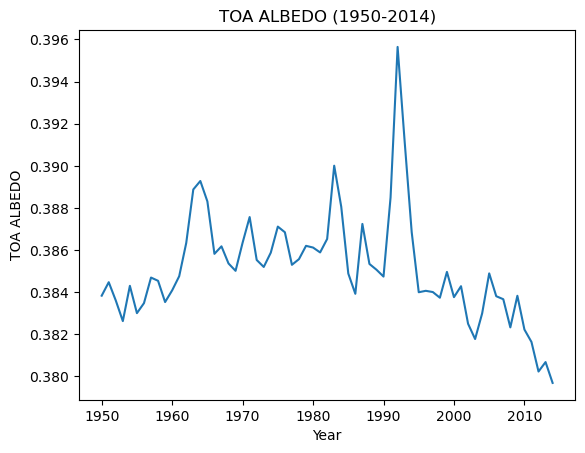

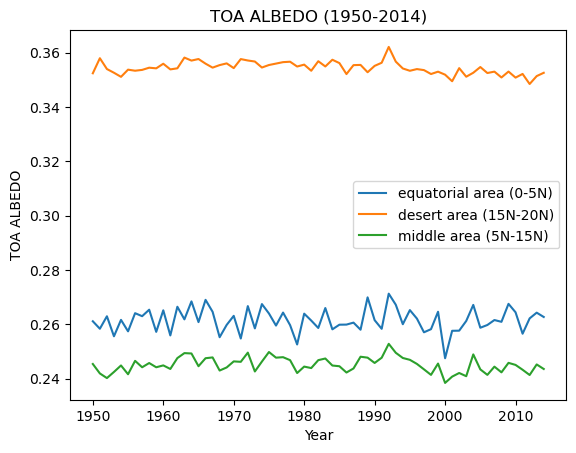

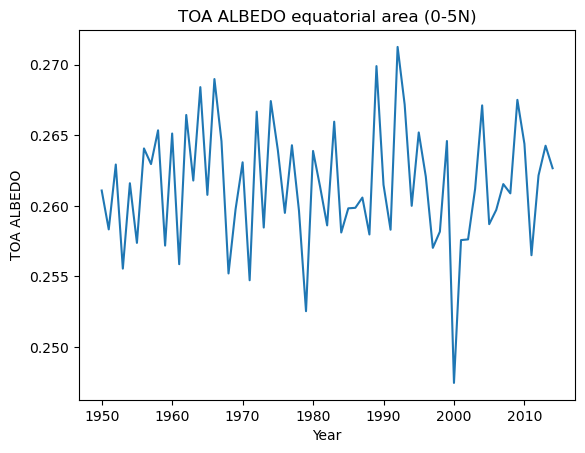

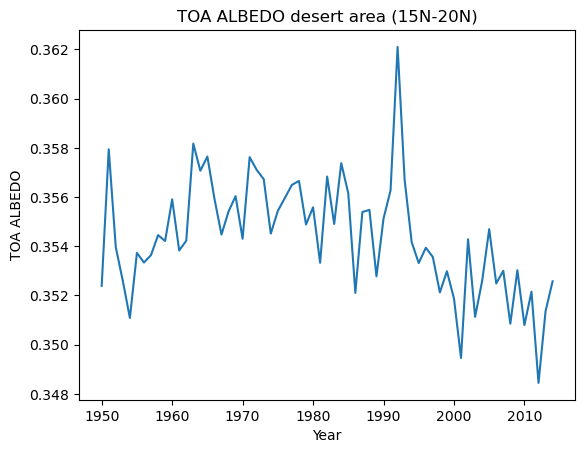

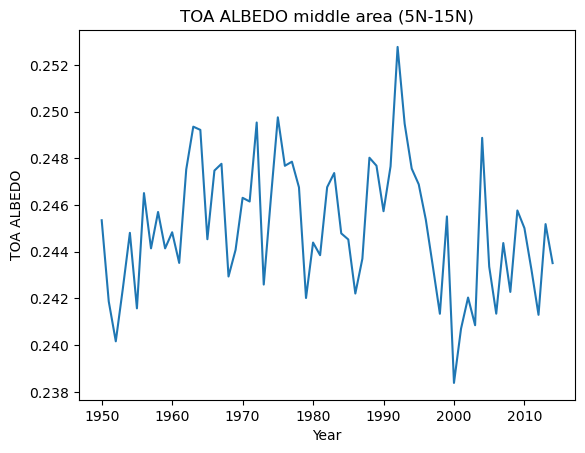

In [6]:
xrange = (lon.>=15) .& (lon.<=20);
yrange = (lat.>=0) .& (lat.<=20);
yrange_equatorial = (lat.>=0) .& (lat.<=5);
yrange_desert = (lat.>=15) .& (lat.<=20);
yrange_middle = (lat.>=5) .& (lat.<=15);


years = 1950:2014

a_equatorial = outgoing[xrange,yrange_equatorial,:]./abs.(incident[xrange,yrange_equatorial,:])
a_means_desert = outgoing[xrange,yrange_desert,:]./abs.(incident[xrange,yrange_desert,:])
a_middle = outgoing[xrange,yrange_middle,:]./abs.(incident[xrange,yrange_middle,:])

annual_means_equatorial = zeros(length(years))
annual_means_desert = zeros(length(years))
annual_means_middle = zeros(length(years))

for i in 1:length(years)
    y1 = a_equatorial[:,:, i]
    annual_means_equatorial[i] = mean(y1)

    y2 = a_means_desert[:,:, i]
    annual_means_desert[i] = mean(y2)

     y3 = a_middle[:,:, i]
    annual_means_middle[i] = mean(y3)
end


using PyPlot
annual_means1 = zeros(length(years))

for i in 1:length(years)
    y = albedo[:, :, i]
    annual_means1[i] = mean(y)
end


figure()
plot(years, annual_means1)
xlabel("Year")
ylabel("TOA ALBEDO")
title("TOA ALBEDO (1950-2014)")
show()
savefig("plot_image.png")

figure()
plot(years, annual_means_equatorial,years,annual_means_desert,years,annual_means_middle)
xlabel("Year")
ylabel("TOA ALBEDO")
title("TOA ALBEDO (1950-2014)")
show()
legend(["equatorial area (0-5N)","desert area (15N-20N)","middle area (5N-15N)"])


means=(annual_means_equatorial,annual_means_desert,annual_means_middle);
titles=("TOA ALBEDO equatorial area (0-5N)","TOA ALBEDO desert area (15N-20N)","TOA ALBEDO middle area (5N-15N)");

for i in 1:3
    figure()
    plot(years,means[i])
    xlabel("Year")
    ylabel("TOA ALBEDO")
    title(titles[i])
end


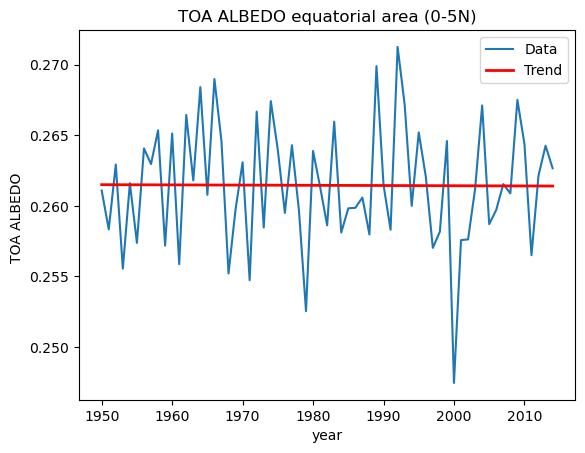

(0.9582, -1.4886898281685396e-6)

In [15]:
#TRENDS
using Polynomials #minimise the error 

f=fit(years, annual_means_equatorial, 1) #the number before x is the variation per year of T
b=f[0]; a=f[1]; #parameters, a=SLOPE
trend=years*a .+ b;
plot(years, annual_means_equatorial)
plot(years, trend,color=:red,linewidth=2)
xlabel("year"); ylabel("TOA ALBEDO ");
title("TOA ALBEDO equatorial area (0-5N)")
legend(["Data","Trend","P/E=1"])

using Random
x=years
y=annual_means_equatorial
using Polynomials, Random
function shufflingfit(x, y,a; n=1000)  
  s=zeros(n,1)
  for i=1:n
    f=fit(x,shuffle(y),1)
    s[i]=f[1]
  end
  count = sum(abs.(s).>abs.(a))
  return (count/n) #count/n=count percentage
end
(p) = shufflingfit(x,y,a, n=10000) #if p>0.05 the trend is not significant
p,a

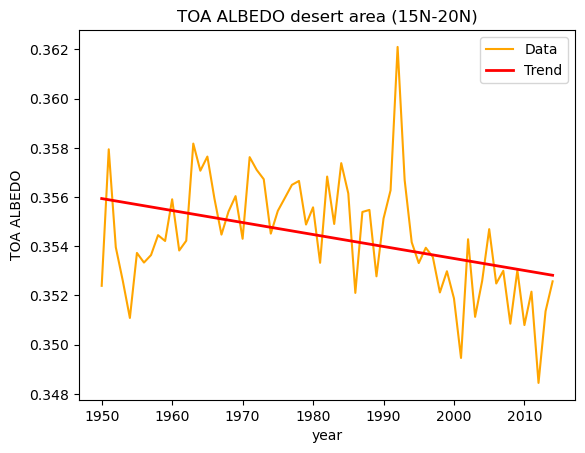

(0.0017, -4.870792837826568e-5)

In [16]:
using Polynomials #minimise the error 

f=fit(years, annual_means_desert, 1) #the number before x is the variation per year of T
b=f[0]; a=f[1]; #parameters, a=SLOPE
trend=years*a .+ b;
plot(years, annual_means_desert,color=:orange)
plot(years, trend,color=:red,linewidth=2)
xlabel("year"); ylabel("TOA ALBEDO");
title("TOA ALBEDO desert area (15N-20N)")
legend(["Data","Trend","P/E=1"])
show()
y=annual_means_desert
(p) = shufflingfit(x,y,a, n=10000) #if p>0.05 the trend is not significant
p,a

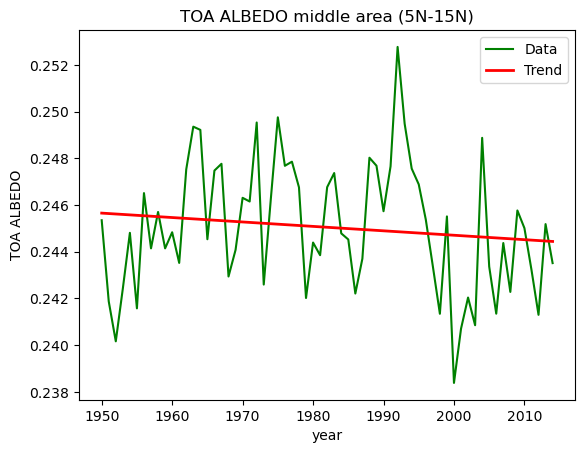

(0.3057, -1.8965566231238233e-5)

In [17]:
using Polynomials #minimise the error 

f=fit(years, annual_means_middle, 1) #the number before x is the variation per year of T
b=f[0]; a=f[1]; #parameters, a=SLOPE
trend=years*a .+ b;
plot(years, annual_means_middle,color=:green)
plot(years,trend,color=:red,linewidth=2)
xlabel("year"); ylabel("TOA ALBEDO");
title("TOA ALBEDO middle area (5N-15N)")
legend(["Data","Trend","P/E=1"])
show()
y=annual_means_middle
(p) = shufflingfit(x,y,a, n=10000) #if p>0.05 the trend is not significant
p,a